In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
plt.style.use('willo')

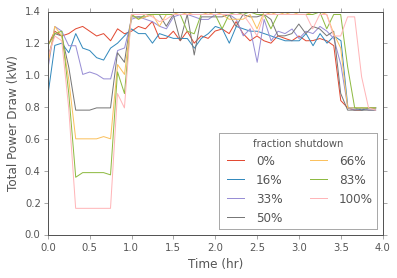

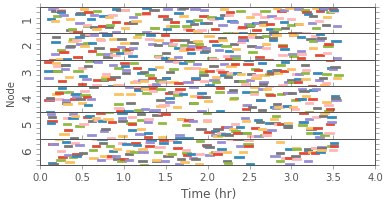

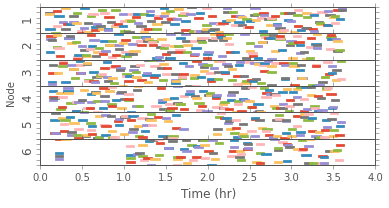

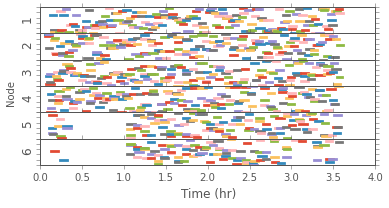

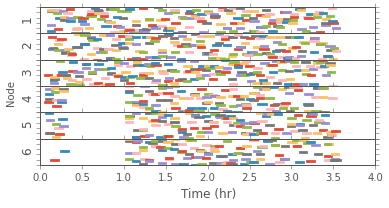

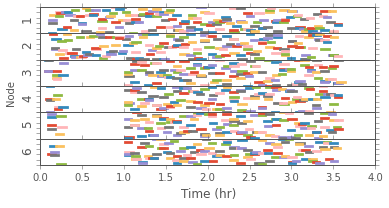

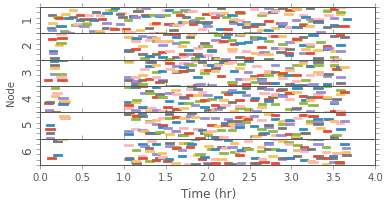

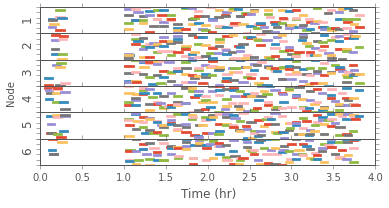

In [4]:
strux = pd.read_csv('../../data/data_exp_strux/strux.csv',thousands=',')
strux['Time']=pd.to_datetime(strux['Time'])

noffs = range(7)
offsets = [ pd.Timedelta('0 hours')]
fig = plt.figure(figsize=(6, 4))
        
for t_offset in offsets:
    for noff in noffs:
        gang = pd.read_csv('../../data/data_exp_'+str(noff)+'/gang_data.csv')
        gang['Timestamp']=pd.to_datetime([val.rsplit('-',1)[0] for val in gang['Timestamp']])
        
        t_str = gang['Timestamp'].iloc[0]+ t_offset
        t_end = gang['Timestamp'].iloc[0]+pd.Timedelta('4 hours') + t_offset
        
        gang = gang[(gang['Timestamp']>t_str) & (gang['Timestamp']<t_end)]        
        
        substrux = strux[(strux['Time']>t_str) & (strux['Time']<t_end)]
        
        slurm = pd.read_csv('../../data/data_exp_'+str(noff)+'/slurm_data.csv',header=None)
        slurm[1]=pd.to_datetime(slurm[1])
        slurm[2]=pd.to_datetime(slurm[2])
        slurm[21]=pd.to_timedelta(slurm[21])

        fig.gca().plot((substrux['Time']-substrux['Time'].iloc[0]).dt.seconds/3600.,substrux['Value']/1000.,label=str(100*noff/6)+'%')
        
        
        strt = 5
        todo = 6    
        ind = 0;
        f, ax = plt.subplots(todo, sharex=True, sharey=True, figsize=(6, 3))
        for index in range(strt,strt+todo):
            co = next(ax[0]._get_lines.color_cycle)
            pick = 'midway'+str(index).zfill(3)
            sub = pick+'|Timestamp'  
            subgang = gang.filter(regex=sub)
            subgang.columns=["".join(col.lstrip(pick).split()) for col in subgang.columns]
            
            subslurm = slurm[(slurm[0]==pick) & (slurm[1]>t_str) & (slurm[1]<t_end)]

            if('domain_avg_power' in subgang):
                for k in subslurm.iterrows():
                    v = random.random() 
                    ax[ind].plot([(k[1][1]-t_str+pd.Timedelta('3 minutes')).seconds/3600.,(k[1][2]-t_str+pd.Timedelta('3 minutes')).seconds/3600.],[v,v],linewidth=np.log(1+k[1][8])*2)
                ax[ind].set_xlim([0, 4])
                ax[ind].set_ylabel(str(index-strt+1))
                ind = ind+1
        
        #plt.plot(ts,dt)
        f.subplots_adjust(hspace=0)
        plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
        plt.setp([a.get_yticklabels() for a in f.axes], visible=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off') # labels along the bottom edge are off
        f.text(0.06, 0.5, 'Node', ha='center', va='center', rotation='vertical')
        plt.xlabel('Time (hr)')
        plt.gcf().subplots_adjust(bottom=0.17)
        if(noff==0 or noff==4):
            f.savefig("../figures/usage_viz"+str(noff)+".pdf", format='pdf', dpi=1000)
plt.figure(1)
plt.ylim([0, 1.4])
plt.ylabel('Total Power Draw (kW)')
plt.xlabel('Time (hr)')
plt.legend(loc=4,ncol=2,title='fraction shutdown')
fig.savefig("../figures/power_viz.pdf", format='pdf', dpi=1000)